<a href="https://colab.research.google.com/github/sapanapawar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Sapana_Pawar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Loading the Required Libraries and Modules

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

The first step is to explore the dataset and understand the data.

#Mount drive & load the dataset

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Working directory path
file_path = '/content/drive/MyDrive/pd csv file/SeoulBikeData.csv'

In [4]:
#Reading the dataset
dataset = pd.read_csv(file_path, encoding= 'unicode_escape')

#Exploration

In [5]:
#Let's how the dataset look like
dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#Renaming the columns
dataset.columns=['Date','Rent_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'DPT',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day']

In [7]:
#Observing first five rows
dataset.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
#Observing last five rows
dataset.tail()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
#Checking for number of rows and columns
dataset.shape

(8760, 14)

There are total 8760 columns and 14 rows in the dataset.

In [10]:
#Let's see the descriptive summary 
dataset.describe(include='all')

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,26/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


The describe() function provides a statistical summary of all the quantitative variables.



In [11]:
#Basic information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Rent_Bike_Count  8760 non-null   int64  
 2   Hour             8760 non-null   int64  
 3   Temperature      8760 non-null   float64
 4   Humidity         8760 non-null   int64  
 5   Wind_speed       8760 non-null   float64
 6   Visibility       8760 non-null   int64  
 7   DPT              8760 non-null   float64
 8   Solar_Radiation  8760 non-null   float64
 9   Rainfall         8760 non-null   float64
 10  Snowfall         8760 non-null   float64
 11  Seasons          8760 non-null   object 
 12  Holiday          8760 non-null   object 
 13  Functioning_Day  8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [12]:
#Looking for duplicates
dataset.duplicated().sum()

0

There are no duplicates present in the dataset.

#Let's see some visualization before doing data cleaning

Text(0, 0.5, 'Rent_Bike_Count')

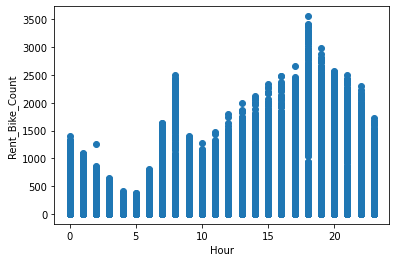

In [13]:
#Plotting the scatter plot of hour vs rented bike count
plt.scatter(x=dataset['Hour'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Hour')
plt.ylabel('Rent_Bike_Count')

From the above Scatter Chart, we can observe that
data points are closely placed to each other, thereby forming
dark linear patterns on the graph.

Text(0, 0.5, 'Rent_Bike_Count')

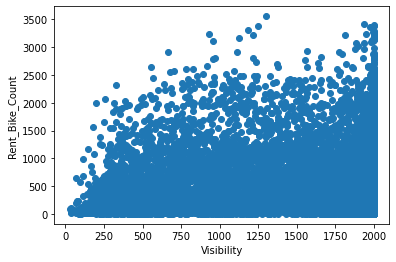

In [14]:
#Plotting the scatter plot of visibility vs rented bike count
plt.scatter(x=dataset['Visibility'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Visibility')
plt.ylabel('Rent_Bike_Count')

Text(0, 0.5, 'Rent_Bike_Count')

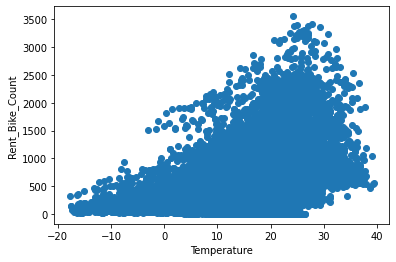

In [15]:
#Plotting the scatter plot of temperature vs rented bike count
plt.scatter(x=dataset['Temperature'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Temperature')
plt.ylabel('Rent_Bike_Count')

From the above distribution, Rental Bike Count is
spread in form of a cloud which is dense around the region
of -20 to 40C. The small tailing clusters towards the higher
end of Y axis shows that almost all the data points will
affect our regression model.


Text(0, 0.5, 'Rent_Bike_Count')

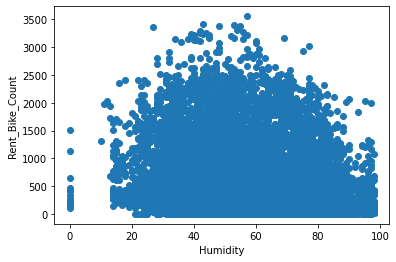

In [16]:
#Plotting the scatter plot of humidity vs rented bike count
plt.scatter(x=dataset['Humidity'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Humidity')
plt.ylabel('Rent_Bike_Count')

From the above Scatter Plot, it is evident that data
points form a cloud for Humidity ranging between 20 to
100. 

Text(0, 0.5, 'Rent_Bike_Count')

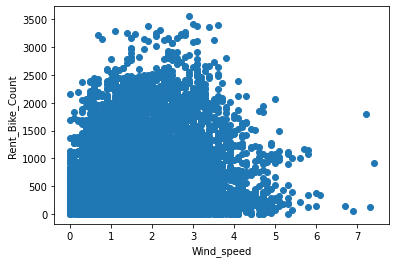

In [17]:
#Plotting the scatter plot of wind speed vs rented bike count
plt.scatter(x=dataset['Wind_speed'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Wind_speed')
plt.ylabel('Rent_Bike_Count')

The data
points form a prominent cloud around the Wind Speed lying
between 0-5 m/s.

Text(0, 0.5, 'Rent_Bike_Count')

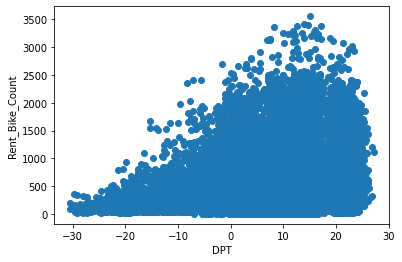

In [18]:
#Plotting the scatter plot of DPT vs rented bike count
plt.scatter(x=dataset['DPT'], y=dataset['Rent_Bike_Count'])
plt.xlabel('DPT')
plt.ylabel('Rent_Bike_Count')

From the above Scatter Plot, the formed data point cloud
depicts that Dew Point Temperatures did not make any
significant impact until Rental Bike Count reached 500.

Text(0, 0.5, 'Rent_Bike_Count')

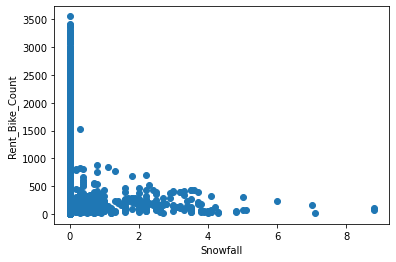

In [19]:
#Plotting the scatter plot of snowfall vs rented bike count
plt.scatter(x=dataset['Snowfall'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Snowfall')
plt.ylabel('Rent_Bike_Count')

The Scatter Plot above suggest, 0 cm Snowfall
dominated the Rental Count distribution and clusters lying till
4 cm. 

Text(0, 0.5, 'Rent_Bike_Count')

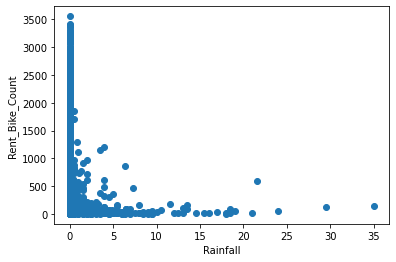

In [20]:
#Plotting the scatter plot of rainfall vs rented bike count
plt.scatter(x=dataset['Rainfall'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Rainfall')
plt.ylabel('Rent_Bike_Count')

The Scatter Plot above suggests that a significant
number of counts lies along the dates when Rainfall was equal
to 0 mm.

#Data Cleaning

#Checking for Outliers

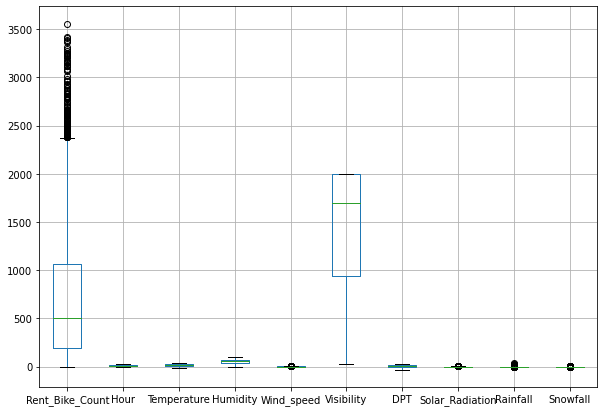

In [21]:
#Checking for outliers by plotting boxplot
fig = plt.figure(figsize =(10, 7))
dataset.boxplot()

We had plotted boxplot for all the columns in the dataset. From this box plot we conclude that in the columns 'Rent_bike_count', 'Wind_speed', 'Solar_radiation', 'Rainfall' and 'Snowfall' outliers are present.

**Let's see one by one....**

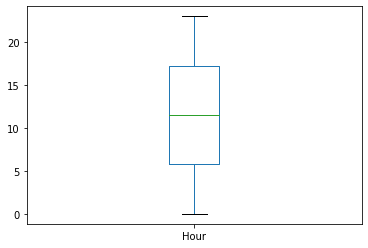

In [22]:
#Plotting boxplot of column "Hour"
dataset['Hour'].plot(kind = 'box')

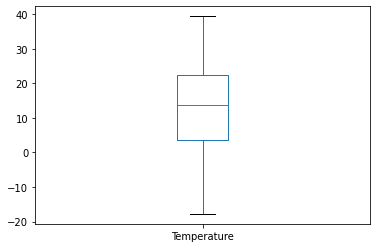

In [23]:
#Plotting boxplot of column "Tempreture"
dataset['Temperature'].plot(kind = 'box')

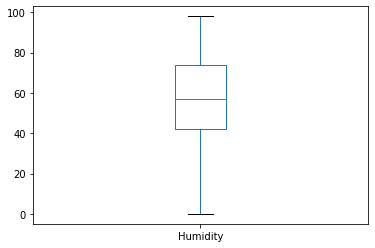

In [24]:
#Plotting boxplot of column "Humidity"
dataset['Humidity'].plot(kind = 'box')

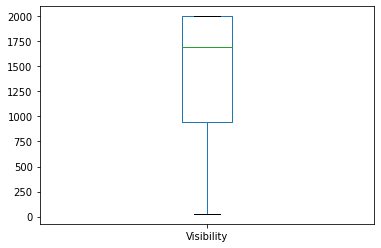

In [25]:
#Plotting boxplot of column "Visibility"
dataset['Visibility'].plot(kind= 'box')

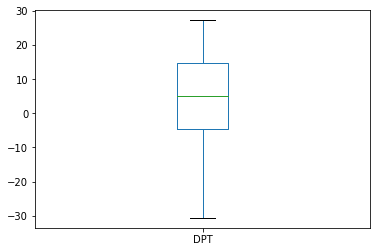

In [26]:
#Plotting boxplot of column "DPT"
dataset['DPT'].plot(kind= 'box')

As we can see there are no outliers present in the columns, namely 'Hour', 'Tempreture', and 'Humidity'and DPT.

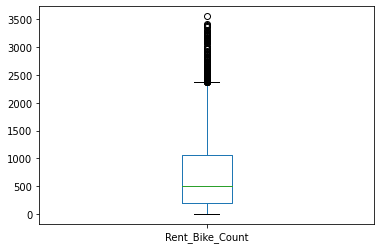

In [27]:
#Plotting boxplot of column "Rent_Bike_Count"
dataset['Rent_Bike_Count'].plot(kind = 'box')

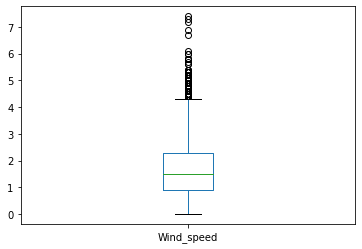

In [28]:
#Plotting boxplot of column "Wind_speed"
dataset['Wind_speed'].plot(kind= 'box')

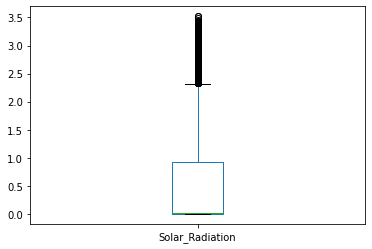

In [29]:
#Plotting boxplot of column "Solar_Radiation"
dataset['Solar_Radiation'].plot(kind= 'box')

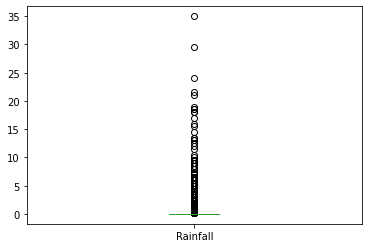

In [30]:
#Plotting boxplot of column "Rainfall"
dataset['Rainfall'].plot(kind= 'box')

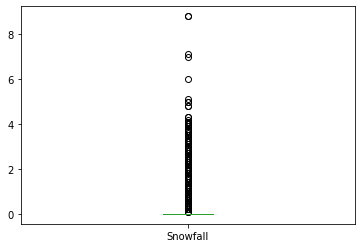

In [31]:
#Plotting boxplot of column "Snowfall"
dataset['Snowfall'].plot(kind= 'box')

Here the outliers are detected in the columns 'Rent_Bike_Count', 'Solar_Padiation', 'Rainfall' and 'Snowfall'.

**Using IQR Score we have to remove outliers present in the dataset.**

**IQR**

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

In [32]:
#Removing the outliers 
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rent_Bike_Count     874.25
Hour                 11.50
Temperature          19.00
Humidity             32.00
Wind_speed            1.40
Visibility         1060.00
DPT                  19.50
Solar_Radiation       0.93
Rainfall              0.00
Snowfall              0.00
dtype: float64


The above output prints the IQR scores, which can be used to detect outliers.

**IQR Score**

This technique uses the IQR scores calculated earlier to remove outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. The first line of code below removes outliers based on the IQR range and stores the result in the data frame 'dataset_clr'. The second line prints the shape of this data, which comes out to be 6922 observations of 14 variables. This shows that for our data, a lot of records get deleted if we use the IQR method.

In [33]:
#Get the dataframe 
dataset_clr = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_clr.shape

(6922, 14)

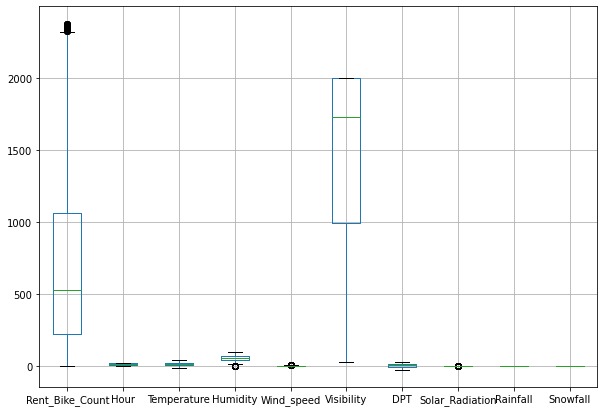

In [34]:
#Plotting boxplot after removing outliers
fig = plt.figure(figsize =(10, 7))
dataset_clr.boxplot()

In [35]:
dataset_clr.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#Checking for Null/NaN/Missing Values

In [36]:
#Checking for is their any null value present or not
dataset_clr.isnull().sum()

Date               0
Rent_Bike_Count    0
Hour               0
Temperature        0
Humidity           0
Wind_speed         0
Visibility         0
DPT                0
Solar_Radiation    0
Rainfall           0
Snowfall           0
Seasons            0
Holiday            0
Functioning_Day    0
dtype: int64

As we can see their is no Null value present in the dataset.

#Data Visualization

In [37]:
#Importing seaborn library
import seaborn as sns

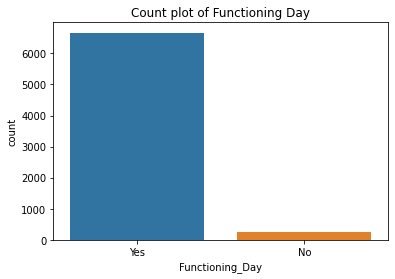

In [38]:
#Plotting the countplot
plt.title("Count plot of Functioning Day")
sns.countplot(x="Functioning_Day", data=dataset_clr)

The count of functioning day was more than that day's where there were no functioning day.

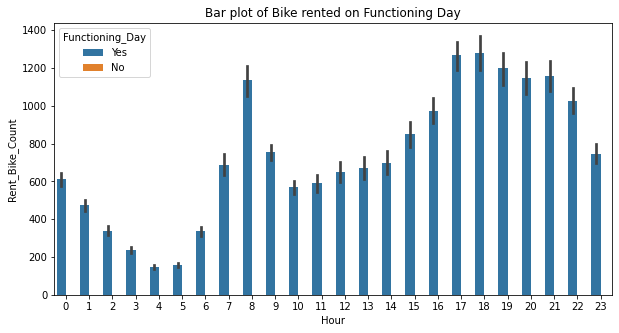

In [39]:
#Plotting barplot 
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    plt.title("Bar plot of Bike rented on Functioning Day")
    sns.barplot(x=x,y=y,hue=hue,data=dataset_clr);
barplots('Hour','Rent_Bike_Count','Functioning_Day')

Here we can see for every hour on the functioning day the bike had rented.But when the day was not the functioning day their had no bike rented.

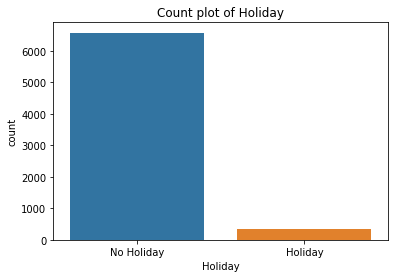

In [40]:
#plotting the count plot of holiday
plt.title("Count plot of Holiday")
sns.countplot(x="Holiday", data=dataset_clr)

The count of the day when the day was not holiday is more than the day when the day was holiday.

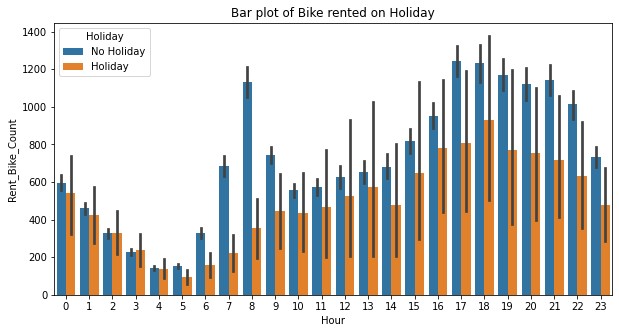

In [41]:
#plotting barplots
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    plt.title("Bar plot of Bike rented on Holiday")
    sns.barplot(x=x,y=y,hue=hue,data=dataset_clr);
barplots('Hour','Rent_Bike_Count','Holiday')

In this plot we can say that when the day was not holiday, rented bike count is maximum than when the day was holiday.




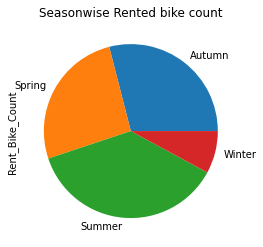

In [42]:
#Seasonwise Rented bike count
plt.title("Seasonwise Rented bike count")
dataset.groupby('Seasons').sum()['Rent_Bike_Count'].plot.pie()

Most of the bike rented in the summer season.

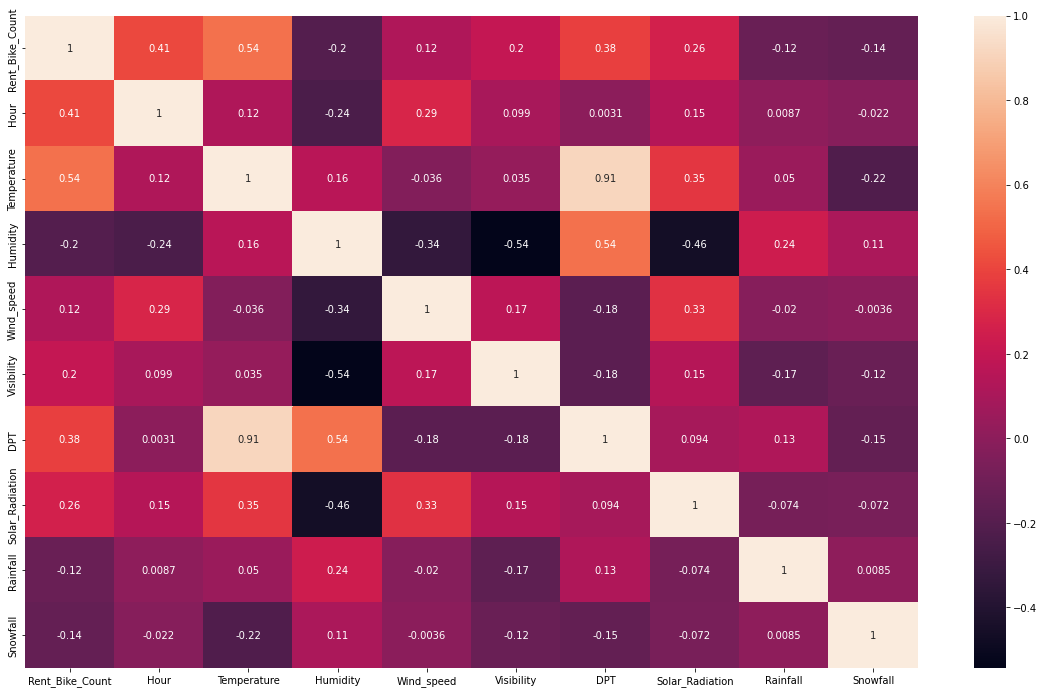

In [43]:
# Correlation
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr(),annot=True)

As we can see the DPT(Dew Point Tempreture) is strongly correlated with Tempreture with correlation 0.91.So we have to drop the column 'DPT'.

In [44]:
#Drop the column having high correlation
dataset_clr.drop('DPT', axis=1, inplace=True)

In [45]:
dataset_clr.shape

(6922, 13)

#Feature Engineering

In [46]:
#Converting the Date column in Datetime Dtype
dataset_clr['Date']=pd.to_datetime(dataset_clr['Date'])

#Converting the Date column into the 3 new columns('day','month','year')
dataset_clr['Day']=dataset_clr['Date'].dt.day
dataset_clr['Month']=dataset_clr['Date'].dt.month
dataset_clr['Year']=dataset_clr['Date'].dt.year

In [47]:
dataset_clr.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


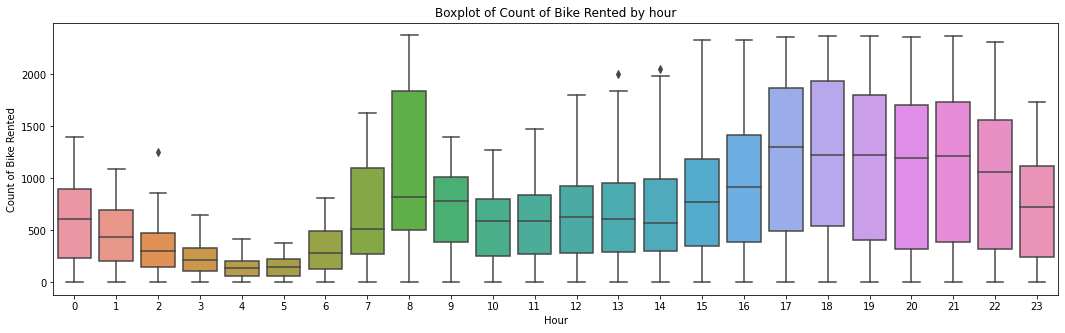

In [48]:
#plotting boxplot of hourly rented bike count
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=dataset_clr['Hour'], y=dataset_clr['Rent_Bike_Count'], ax=ax)
ax.set_ylabel('Count of Bike Rented')
ax.set_title("Boxplot of Count of Bike Rented by hour");

Above, we can see the trend of bike rent over hours. Quickly, we’ll segregate the bike rent in three categories:

High : 7-9 and 16-12 hours

Average : 10-15 hours

Low : 3-5 hours Here we have analyzed the distribution of total bike rent.

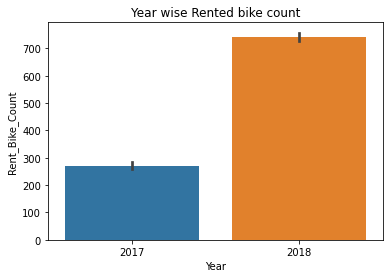

In [49]:
#Plotting barplot between year and rented bike count
plt.title("Year wise Rented bike count")
sns.barplot(x='Year', y='Rent_Bike_Count', data=dataset_clr)

Most of the bike rented in 2018 as compare to 2017.

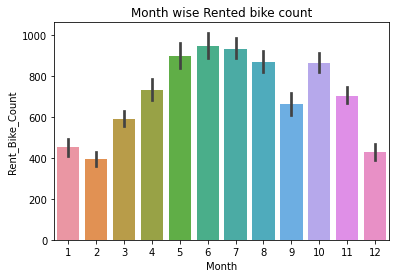

In [50]:
#Plotting barplot between month and rented bike count
plt.title("Month wise Rented bike count")
sns.barplot(x='Month', y='Rent_Bike_Count', data=dataset_clr)

Most of the bike rented in the month of June.


In [51]:
dataset['Solar_Radiation'].mean()

0.5691107305936114

In [52]:
#Converting Contionus variable to categorical variable for ease in prediction
dataset['Visibility']=dataset['Visibility'].apply(lambda x: 1 if x>=2000 else 0)
dataset['Solar_Radiation']=dataset['Solar_Radiation'].apply(lambda x:1 if x>=0.5691 else 0)

In [53]:
dataset.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,1,-17.6,0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,1,-17.6,0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,1,-17.7,0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,1,-17.6,0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,1,-18.6,0,0.0,0.0,Winter,No Holiday,Yes


In [54]:
dataset['Solar_Radiation'].value_counts()

0    6007
1    2753
Name: Solar_Radiation, dtype: int64

#Categorical Encoding

**Label Encoding**

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

Let’s implement label encoding on the categorical variable and understand the challenges with label encoding.




In [55]:
#label encoding
encoders_nums = {"Holiday":{"No Holiday":1,"Holiday":0},"Functioning_Day":{"Yes":1,"No":0}}
dataset_pr = dataset_clr.replace(encoders_nums)

In [56]:
dataset_pr

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,1,1,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,1,1,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,1,1,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,1,1,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,1,1,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,1,1,30,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,1,1,30,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,1,1,30,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,1,1,30,11,2018


**One hot encoding**

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

One-Hot Encoding is the process of creating dummy variables.

Let’s implement label encoding on the categorical variable and understand how the dummy variables create.

In [57]:
# One hot encoding
new_dataset = pd.get_dummies(dataset_pr, columns = ['Seasons'], prefix=['Seasons'])
new_dataset.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,12,1,2017,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,12,1,2017,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,12,1,2017,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,12,1,2017,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,12,1,2017,0,0,0,1


In [58]:
#Let's see how the dataset looks after implementing categorical coding
new_dataset.shape

(6922, 19)

In [59]:
#Let's drop the column which are not necessary
new_dataset.drop(columns=['Date','Day','Year','Snowfall','Rainfall'], axis=1,inplace=True)

Here we dropped some columns from our dataset to get better result.


*   We dropped column 'Date', 'Day' and 'Year' which are not important.
*   We dopped column 'Snowfall'and 'Rainfall' because they are highly skewed towards zero.







In [60]:
new_dataset.head()

,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Holiday,Functioning_Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,1,1,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,1,1,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,1,1,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,1,1,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,1,1,1,0,0,0,1


In [61]:
new_dataset.shape

(6922, 14)

#Creating the data for the Features and the Target Variable.

In [62]:
#Creating the data of dependent variable 'Rented Bike Count'
y = new_dataset['Rent_Bike_Count']

In [63]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rent_Bike_Count, Length: 6922, dtype: int64

In [64]:
#Creating the data of Independent variables
X = new_dataset.drop('Rent_Bike_Count', axis=1)

In [65]:
X

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Holiday,Functioning_Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,-5.2,37,2.2,2000,0.0,1,1,1,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,1,1,1,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,1,1,1,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,1,1,1,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,1,1,11,1,0,0,0
8756,20,3.4,37,2.3,2000,0.0,1,1,11,1,0,0,0
8757,21,2.6,39,0.3,1968,0.0,1,1,11,1,0,0,0
8758,22,2.1,41,1.0,1859,0.0,1,1,11,1,0,0,0


#Finding correlation in variables (both dependent and independent, Visualizations on data)

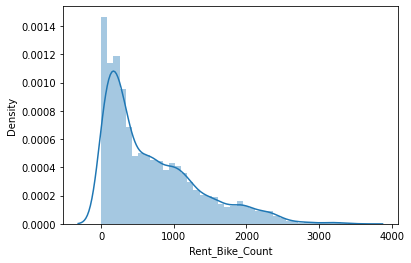

In [66]:
#Plotting distplot of a dependent variable 'Rented Bike Count'
sns.distplot(dataset['Rent_Bike_Count'], hist=True)

As we can see the dependent variable 'Rent_Bike_Count' is skewly distributed.

In [67]:
#Columns of numerical features
numeric_features = ['Rent_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Month']

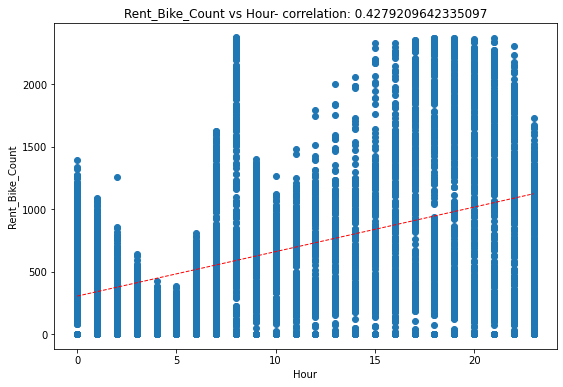

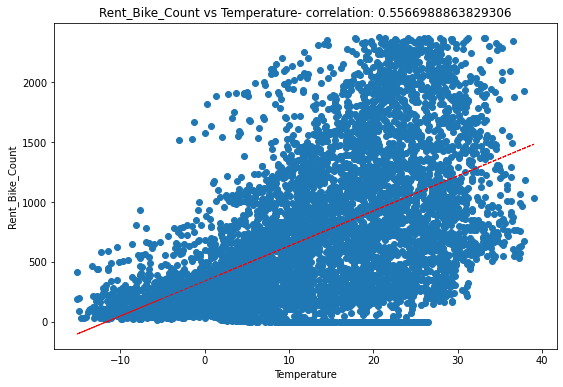

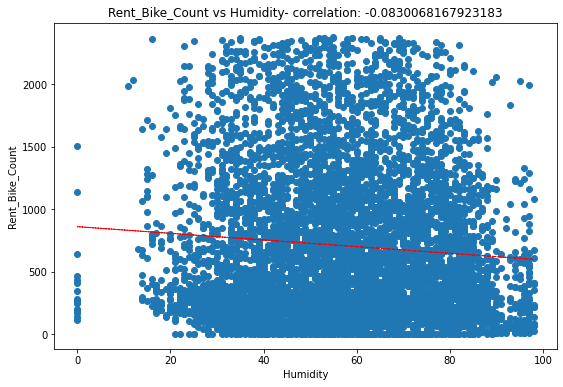

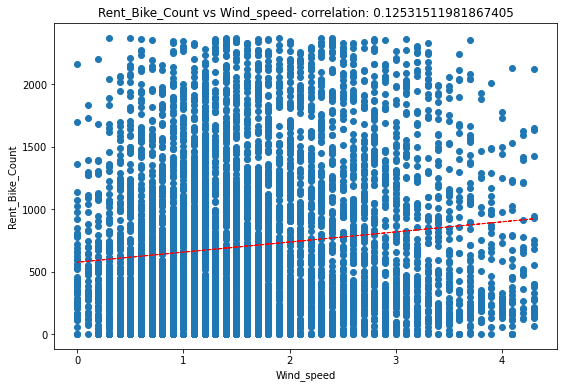

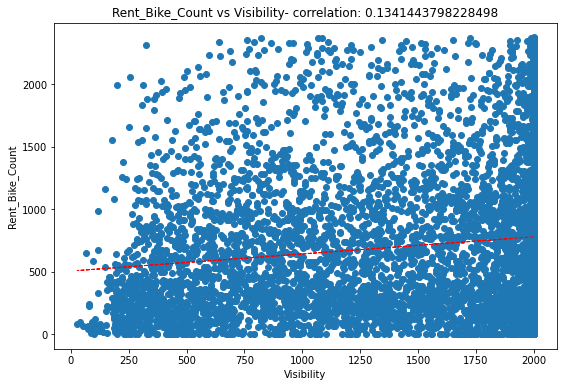

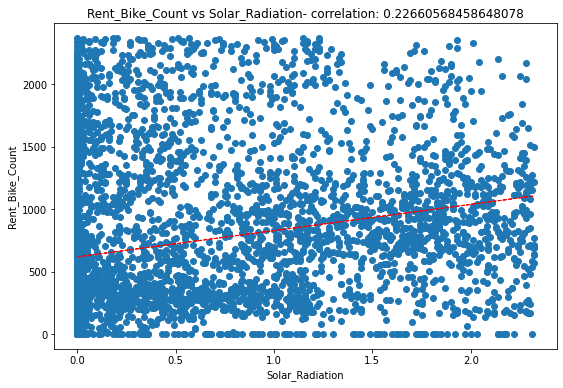

In [68]:
##Scatter plot for numerical features
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = new_dataset[col]
    label = new_dataset['Rent_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rent_Bike_Count')
    ax.set_title('Rent_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(new_dataset[col], new_dataset['Rent_Bike_Count'], 1)
    y_hat = np.poly1d(z)(new_dataset[col])

    plt.plot(new_dataset[col], y_hat, "r--", lw=1)

plt.show()

In [69]:
X.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Holiday,Functioning_Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,-5.2,37,2.2,2000,0.0,1,1,1,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,1,1,1,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,1,1,1,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,1,1,1,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,1,1,1,0,0,0,1


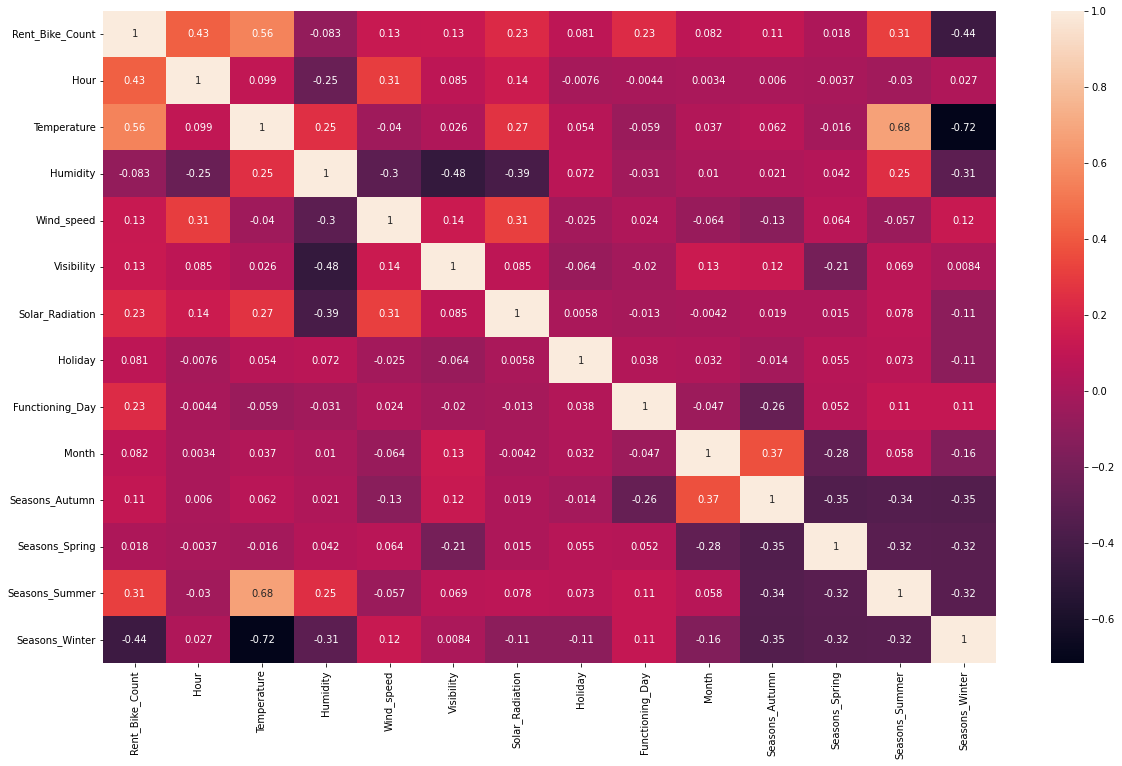

In [70]:
# Correlation
plt.figure(figsize=(20,12))
sns.heatmap(new_dataset.corr(),annot=True)



*   As we can see Temperature is positively correlated with the target variable Rented Bike count with correlation 0.56.


*   Also the Temperature variable have positive correlation of 0.68 with variable Season Summer.


*   The variable Temperature negatively correlated with the Season Winter with correlation 0.72.


*   Also the variables Visibility, Solar Radiation, and all the Seasons have low negative correlation values.


*   The variables Hour, Season Summer and Functioning Day have low corelation with target variable Rented Bike Count.





#Creating the Training and Test Datasets


In [71]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
X_train

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Holiday,Functioning_Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
18,18,0.6,66,1.4,2000,0.00,1,1,1,0,0,0,1
2632,16,5.6,42,4.2,2000,0.81,1,1,3,0,1,0,0
8327,23,6.9,60,0.8,1610,0.00,1,1,12,1,0,0,0
2513,17,10.9,98,1.3,222,0.09,1,1,3,0,1,0,0
7505,17,18.4,39,2.1,2000,0.45,0,0,9,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,3,23.1,80,2.0,1849,0.00,1,1,8,0,0,1,0
4201,1,16.9,61,1.0,844,0.00,1,1,5,0,1,0,0
2117,5,0.6,50,0.1,1026,0.00,1,1,2,0,0,0,1
3260,20,10.3,62,2.0,1749,0.00,1,1,4,0,1,0,0


In [73]:
y_train

18      862
2632    518
8327    702
2513    411
7505      0
       ... 
6411    456
4201    610
2117     72
3260    297
3419    424
Name: Rent_Bike_Count, Length: 4845, dtype: int64

#Create and Fit the Linear Regression Model

**Linear Regression**

The simplest form of regression is the linear regression, which assumes that the predictors have a linear relationship with the target variable. The input variables are assumed to have a Gaussian distribution. Another assumption is that the predictors are not highly correlated with each other (a problem called multi-collinearity).

In [74]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#Predict on the Test Data

In [75]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 579.89673203, 1200.08119737,  567.1149857 , ...,  606.37255789,
        344.57956337,   95.09482665])

In [76]:
y_test

5067     625
3886    1556
3944    1997
8581     731
7430     941
        ... 
8307     122
3579     263
4468     214
1623     171
1136     537
Name: Rent_Bike_Count, Length: 2077, dtype: int64

#Calculating some evaluation metrics

**1.Mean Absolute Error (MAE)**

MAE is the absolute difference between the target value and the value predicted by the model.

In [77]:
#Calculate the mean absolute error
print("MAE",mean_absolute_error(y_test, y_pred))

MAE 308.7282368017584


**2.Mean Squared Error (MSE)**

MSE or Mean Squared Error is one of the most preferred metrics for regression tasks. It is simply the average of the squared difference between the target value and the value predicted by the regression model.

In [78]:
#Calculate the mean squared error
print("MSE",mean_squared_error(y_test, y_pred))

MSE 159536.5731575642


**3.Root Mean Squared Error (RMSE)**

RMSE is the most widely used metric for regression tasks and is the square root of the averaged squared difference between the target value and the value predicted by the model. It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors.

In [79]:
#Calculate the root mean squared error
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 399.4202963765915


**4.R – Squared (R2)**

Coefficient of Determination or R² is another metric used for evaluating the performance of a regression model. The metric helps us to compare our current model with a constant baseline and tells us how much our model is better. The constant baseline is chosen by taking the mean of the data and drawing a line at the mean.

In [80]:
#Calculate the accuracy score
r2 = r2_score(y_test, y_pred)
print("r2",r2_score(y_test, y_pred))

r2 0.5630685570870981


#Finding the residual

In [81]:
#Finding the residual 
residual = y_test - y_pred
residual

5067      45.103268
3886     355.918803
3944    1429.885014
8581    -247.925357
7430    -123.930586
           ...     
8307    -310.812246
3579    -200.922433
4468    -392.372558
1623    -173.579563
1136     441.905173
Name: Rent_Bike_Count, Length: 2077, dtype: float64

In [82]:
#Mean of residual
np.mean(residual)

7.669291368549451

#**Regularized Regression**


Linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model over-fitting on the training dataset. Such a model will not generalize well on the unseen data. To overcome this shortcoming, we do regularization which penalizes large coefficients. The following sections of the guide will discuss the various regularization algorithms.



#Implementing Lasso regression


Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

In [83]:
#Fitting Lasso Regression to the Training set
lasso  = Lasso(alpha=0.1, max_iter=100)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=100)

In [84]:
lasso.score(X_train, y_train)

0.5738746204290684

In [85]:
# Predicting the Test set results
y_pred_l = lasso.predict(X_test)

In [86]:
#Finding the evaluation metrics
print("MAE",mean_absolute_error(y_test, y_pred_l))
print("MSE",mean_squared_error(y_test, y_pred_l))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred_l)))
r2 = r2_score(y_test, y_pred_l)
print("r2",r2_score(y_test,y_pred_l))

MAE 308.71286997965984
MSE 159539.52032417612
RMSE 399.4239856645769
r2 0.5630604855224733


#Implementing Ridge Regression


Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.




In [87]:
#Fitting the Ridge Regression Model to the training set
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [88]:
ridge.score(X_train, y_train)

0.5738766051627837

In [89]:
# Predicting the Test set results
y_pred_r = ridge.predict(X_test)

In [90]:
#Finding the evaluation metrics
print("MAE",mean_absolute_error(y_test, y_pred_r))
print("MSE",mean_squared_error(y_test, y_pred_r))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred_r)))
r2 = r2_score(y_test, y_pred_r)
print("r2",r2_score(y_test, y_pred_r))

MAE 308.7253037539214
MSE 159535.6059831241
RMSE 399.41908565205557
r2 0.5630712059400558


#Implementing Elastic net Regression


ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

In [91]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [92]:
#Fitting the Elastic Net Regression on training dataset
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [93]:
elasticnet.score(X_train, y_train)

0.5415677543839239

In [94]:
#Model Prediction
y_pred_en = elasticnet.predict(X_test)

In [95]:
#Calculating the evaluation metrics
print("MAE",mean_absolute_error(y_test, y_pred_en))
print("MSE",mean_squared_error(y_test,y_pred_en))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred_en)))
r2 = r2_score(y_test, y_pred_en)
print("r2",r2_score(y_test, y_pred_en))

MAE 315.455300530899
MSE 171410.07183297622
RMSE 414.0169946185497
r2 0.5305499639771131


#Implementing Decision Tree Model


Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [96]:
#Fitting the Decision Tree Model on training dataset
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)
Tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

In [97]:
# Predicting the Test set results
y_predicted = Tree_model.predict(X_test)

In [98]:
#Calculating the evaluation metrics
print("MAE",mean_absolute_error(y_test, y_predicted))
print("MSE",mean_squared_error(y_test,y_predicted))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_predicted)))
r2 = r2_score(y_test, y_predicted)
print("r2",r2_score(y_test, y_predicted))

MAE 247.30068190970135
MSE 118143.64306212153
RMSE 343.72029771621214
r2 0.6764336138577006


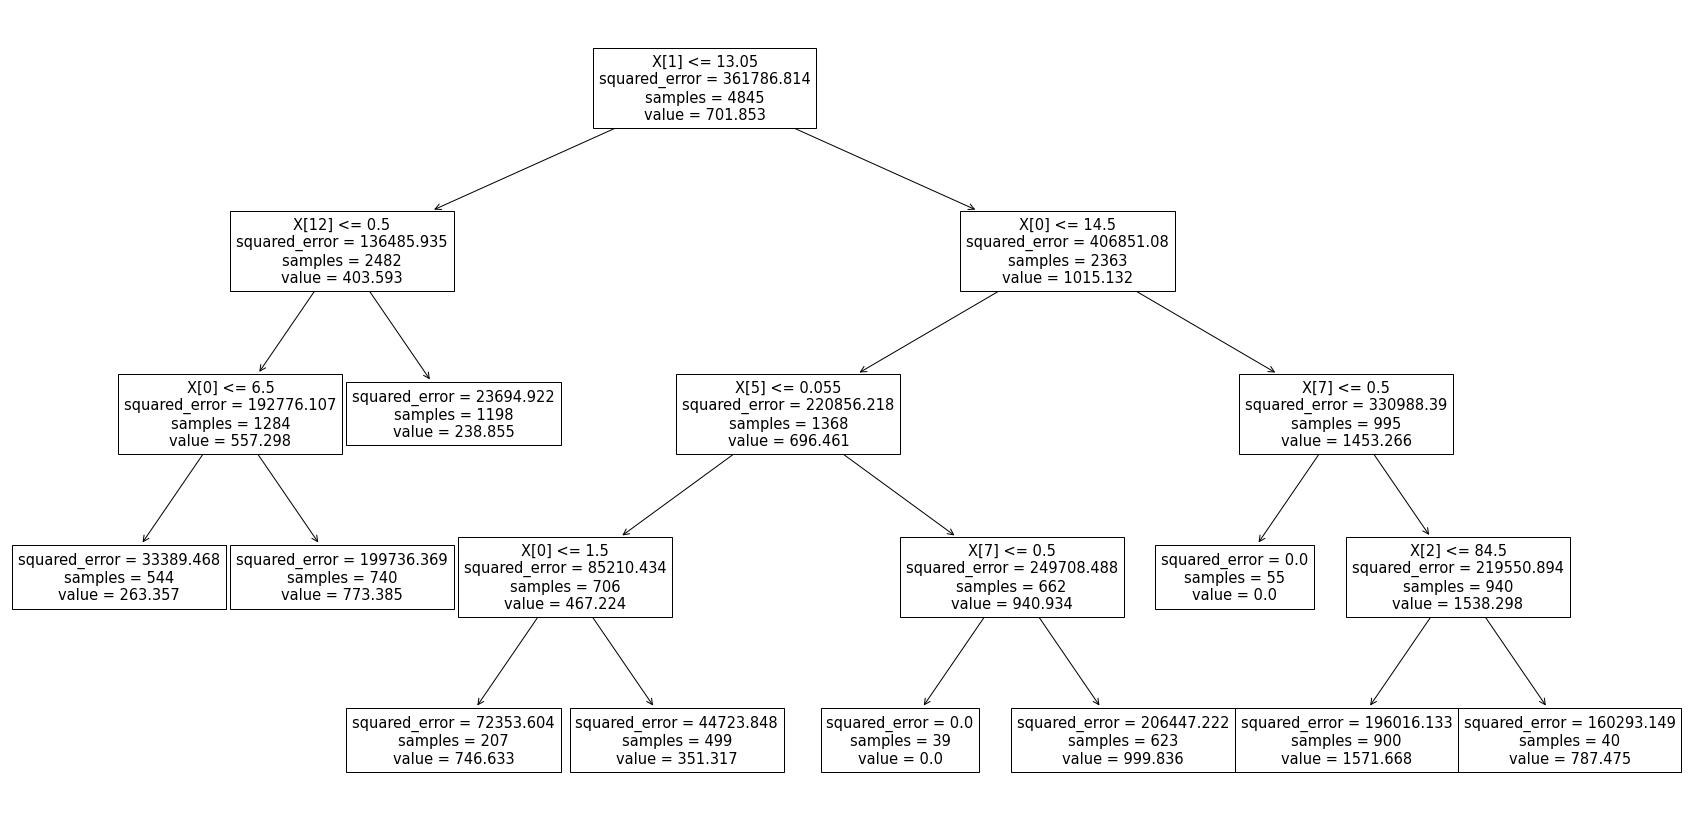

In [99]:
#Plotting a tree model
from sklearn import tree
fig, ax = plt.subplots(figsize=(30, 15))
tree.plot_tree(Tree_model);


#Implementing XGBoost Model


XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.)artificial neural networks tend to outperform all other algorithms or frameworks.

In [100]:
#Fitting the random XGBoost regressor Model on training dataset
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [101]:
#Predicting the test set results
testpred = model.predict(X_test)
print(testpred)

[ 336.6984  1353.0536  1134.6132  ...  380.3918   270.127    413.62457]


In [102]:
#Calculating the evaluation metrics
print("MAE",mean_absolute_error(y_test, testpred ))
print("MSE",mean_squared_error(y_test, testpred))
print("RMSE",np.sqrt(mean_squared_error(y_test, testpred)))
r2 = r2_score(y_test, testpred)
print("r2",r2_score(y_test, testpred))

MAE 165.26771505417364
MSE 60720.725643968995
RMSE 246.4157577022399
r2 0.8337008640386488


#Implementing Random Forest Model

#A random forest regressor  


A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.




In [103]:
#Fitting the random forest regressor Model on training dataset and predicting the test set results
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [104]:
#Predicting the test set results
melb_preds = forest_model.predict(X_test)

In [105]:
#Calculating the evaluation metrics
print("MAE",mean_absolute_error(y_test, melb_preds))
print("MSE",mean_squared_error(y_test, melb_preds))
print("RMSE",np.sqrt(mean_squared_error(y_test, melb_preds)))
r2 = r2_score(y_test, melb_preds)
print("r2",r2_score(y_test, melb_preds))

MAE 139.89526721232545
MSE 50467.600547279726
RMSE 224.64995114016767
r2 0.8617816523757432


#Summary of all the model

In [106]:
#Creating a function which shows short summary of model and evaluation

def evaluate(model, X_test, y_test,model_name):
  #Shows the short summary of model and it's evaluation
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    r_score = 100*r2_score(y_test,predictions)
    mse = mean_squared_error(y_test,predictions)
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Mean Squared Error  : {:0.2f}'.format(mse))
    print('Variance score R^2  : {:0.2f}%\n' .format(r_score))
    

In [107]:
evaluate(LinearRegression().fit(X_train, y_train).fit(X_train,y_train),X_test,y_test,'Linear Regression')
evaluate(Lasso(alpha=0.1).fit(X_train, y_train),X_test,y_test, 'Lasso Regression')
evaluate(Ridge(alpha=0.1,max_iter=100).fit(X_train, y_train),X_test,y_test, 'Ridge Regression')
evaluate(DecisionTreeRegressor(max_leaf_nodes=10, random_state=0).fit(X_train, y_train),X_test,y_test, 'Decision Tree Regressor')
evaluate(XGBRegressor(objective='reg:squarederror').fit(X_train,y_train),X_test,y_test,'XGBRegressor')
evaluate(RandomForestRegressor(random_state=1).fit(X_train,y_train),X_test,y_test,'Random Forest Regressor')


LinearRegression() 

Average Error       : 308.7282 degrees
Mean Squared Error  : 159536.57
Variance score R^2  : 56.31%

Lasso(alpha=0.1) 

Average Error       : 308.7100 degrees
Mean Squared Error  : 159532.38
Variance score R^2  : 56.31%

Ridge(alpha=0.1, max_iter=100) 

Average Error       : 308.7253 degrees
Mean Squared Error  : 159535.61
Variance score R^2  : 56.31%

DecisionTreeRegressor(max_leaf_nodes=10, random_state=0) 

Average Error       : 247.3007 degrees
Mean Squared Error  : 118143.64
Variance score R^2  : 67.64%

XGBRegressor(objective='reg:squarederror') 

Average Error       : 165.2677 degrees
Mean Squared Error  : 60720.73
Variance score R^2  : 83.37%

RandomForestRegressor(random_state=1) 

Average Error       : 139.8953 degrees
Mean Squared Error  : 50467.60
Variance score R^2  : 86.18%



Observations:



*   We have got heighest r2 score for Random Forest Regressor.

*   So to increase r2 score of this model we will do hyperparameter tuning




#Hyperparameter Tuning

#**1.Random Search**

In [108]:
# Create the random grid based on the results of random search 
random_grid = {
    'bootstrap': [True,False],
    'max_depth': [50, 80, 120],
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100]
}
print(random_grid)

{'bootstrap': [True, False], 'max_depth': [50, 80, 120], 'max_features': [2, 3, 5], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [50, 100]}


In [109]:
#Use the random grid to search for best hyperparameters
#First create the base model to tune
rf = RandomForestRegressor()

#Random search of parameters, using 3 fold cross validation,
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring="r2", cv = 3, verbose=2, random_state=42, n_jobs = -1)

#Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 80, 120],
                                        'max_features': [2, 3, 5],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='r2', verbose=2)

In [110]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [111]:
best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features=5,
                      min_samples_leaf=3, min_samples_split=8)

In [112]:
#Predicting the test set results
random_preds = best_random.predict(X_test)

In [113]:
#Calculating the evaluation metrics
print("MAE",mean_absolute_error(y_test, random_preds ))
print("MSE",mean_squared_error(y_test, random_preds))
print("RMSE",np.sqrt(mean_squared_error(y_test, random_preds)))
r2 = r2_score(y_test, random_preds)
print("r2",r2_score(y_test, random_preds))

MAE 142.2308828536646
MSE 49537.27256379324
RMSE 222.56970270859696
r2 0.8643295919494831


#**2.Grid Search**

In [114]:
#Create the parameter grid based on the results of random search
param_grid = { 'bootstrap': [True,False],
              'max_depth': [30, 50, 120],
              'max_features': [2, 3, 5],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [50,100] }

#Create a based model
rf = RandomForestRegressor()

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='r2', cv = 3, n_jobs = -1, verbose = 2)

In [115]:
#Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [116]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features=5,
                      min_samples_leaf=3, min_samples_split=8)

In [117]:
#Predicting the test set results
test_preds = best_grid.predict(X_test)

In [118]:
#Calculating the evaluation metrics
print("MAE",mean_absolute_error(y_test, test_preds ))
print("MSE",mean_squared_error(y_test, test_preds))
print("RMSE",np.sqrt(mean_squared_error(y_test, test_preds)))
r2 = r2_score(y_test, test_preds)
print("r2",r2_score(y_test, test_preds))

MAE 142.97192856891428
MSE 50427.34216943535
RMSE 224.56033080095725
r2 0.861891910172891


We have done hyperparameter tuning using GridSearchCV and RandomsearchCV, And we got a slight change in the R2 score.

Likewise:

GridSearchCV R2 score is 86.18%.

RandomSearchCV R2 score is 86.43%.

So the R2 score of our best model Random Forest Regressor using RandomSearchCV is 86.43% which can be said to be good for this dataset.

#Feature Importance

In [119]:
best_grid.feature_importances_

array([0.33346116, 0.27541189, 0.05570457, 0.02280741, 0.02258326,
       0.05492873, 0.00220448, 0.09321225, 0.01989135, 0.01467301,
       0.0076108 , 0.01677403, 0.08073708])

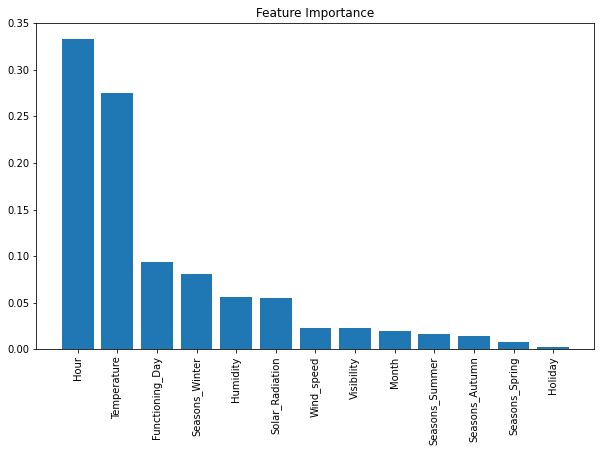

In [120]:
#Plotting a graph showing feature importance
importances = best_grid.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create lot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

Based on this analysis, we choose to built a Random Forest model to predict the number of bike rents. We achieved an R2 accuracy of 86.43% based on 3-folds CV. Finally, it was found that hour and temperature are the most determining feature predictors.